In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array

c:\Users\Javier\miniconda3\envs\computervision\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
limit = 1500
img_size = 160
color_path = '..\kaggle\input\landscape-image-colorization\landscape_Images\color'
gray_path = '..\kaggle\input\landscape-image-colorization\landscape_Images\gray'


In [3]:
generator = tf.keras.models.load_model('generator.keras')
discriminator = tf.keras.models.load_model('discriminator.keras')


In [4]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [5]:
color_img = []       
color_files_pd = sorted_alphanumeric(os.listdir(color_path))[:limit]
for path_direction in color_files_pd:
    img = cv2.imread(os.path.join(color_path, path_direction), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size)).astype('float32') / 255.0
    color_img.append(img)

In [6]:
gray_img = []
gray_files_pd = sorted_alphanumeric(os.listdir(gray_path))[:limit]
for path_direction in gray_files_pd:
    img = cv2.imread(os.path.join(gray_path, path_direction), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size)).astype('float32') / 255.0
    img = np.stack((img,)*3, axis=-1) 
    gray_img.append(img)

In [7]:
# Splitting dataset into training and testing
total_images = len(gray_img)
split_point = int(total_images * 0.8)

train_gray_image = gray_img[:split_point]
train_color_image = color_img[:split_point]
test_gray_image = gray_img[split_point:]
test_color_image = color_img[split_point:]

train_g = np.reshape(train_gray_image, (len(train_gray_image), img_size, img_size, 3))
train_c = np.reshape(train_color_image, (len(train_color_image), img_size, img_size, 3))
test_g = np.reshape(test_gray_image, (len(test_gray_image), img_size, img_size, 3))
test_c = np.reshape(test_color_image, (len(test_color_image), img_size, img_size, 3))

In [25]:
def evaluate_model_performance(model, test_g, test_c):
    psnr_values = []
    ssim_values = []

    for i in range(len(test_g)):
        grayscale_input = test_g[i].reshape(1, img_size, img_size, 3)
        predicted = np.clip(model.predict(grayscale_input), 0.0, 1.0).reshape(img_size, img_size, 3)

        psnr = tf.image.psnr(predicted, test_c[i], max_val=1.0).numpy()
        ssim = tf.image.ssim(predicted, test_c[i], max_val=1.0).numpy()

        psnr_values.append(psnr)
        ssim_values.append(ssim)

    return np.mean(psnr_values), np.mean(ssim_values)


# Evaluate VAE Model
test_g  = np.reshape(gray_img, (len(gray_img), img_size, img_size, 3))
test_c = np.reshape(color_img, (len(color_img), img_size, img_size, 3))

vae_psnr, vae_ssim = evaluate_model_performance(generator, test_g , test_c)
print(f"VAE Model - PSNR: {vae_psnr}, SSIM: {vae_ssim}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


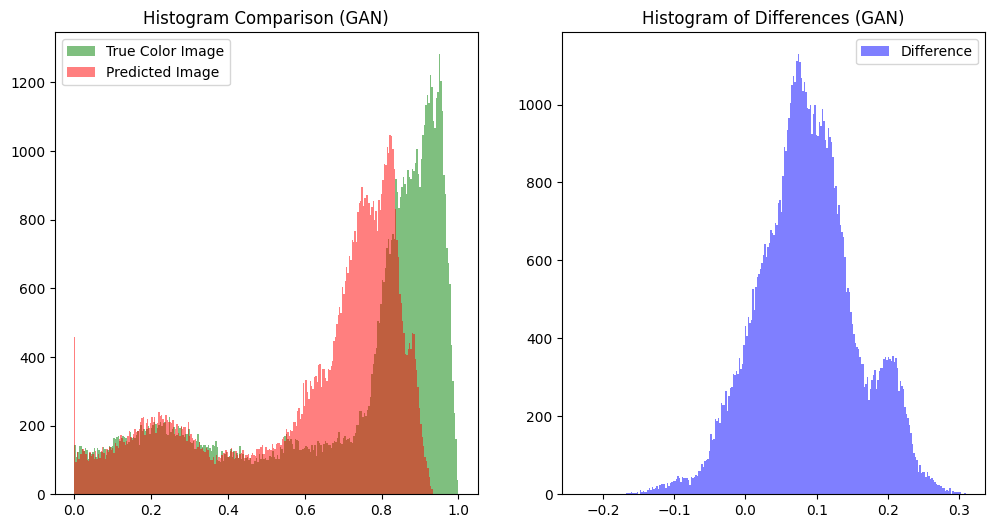

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


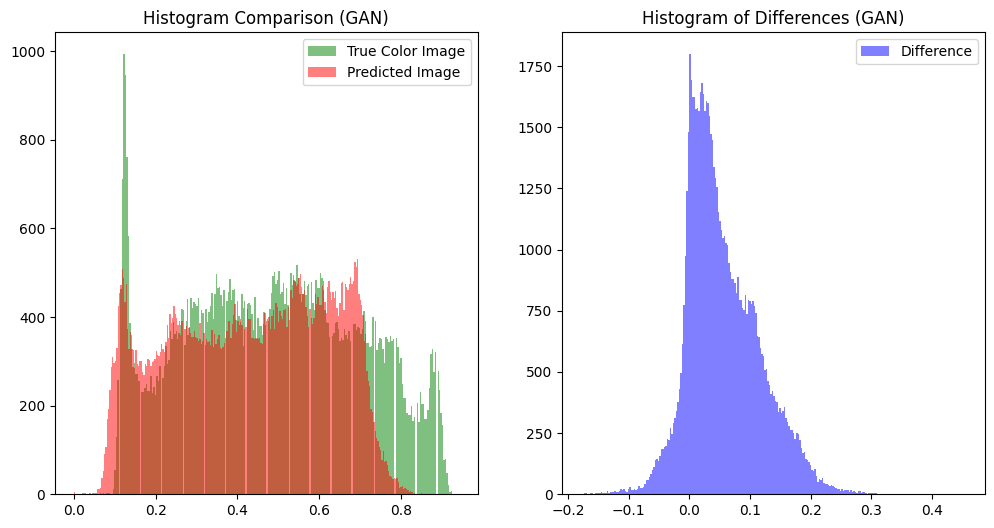

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


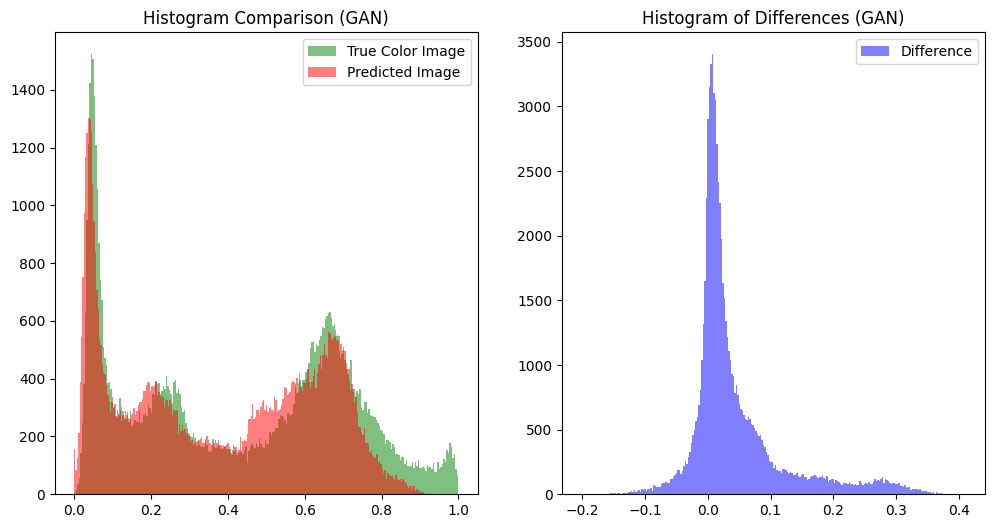

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


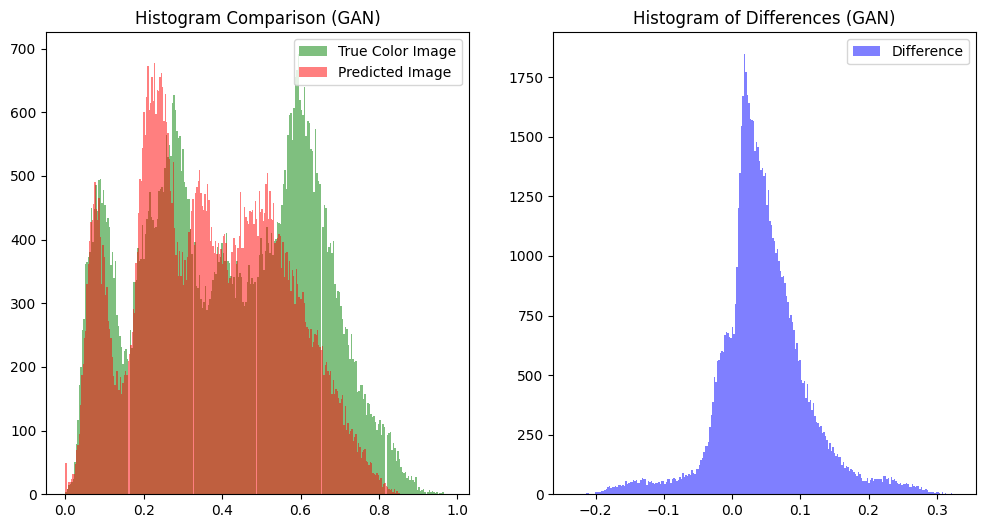

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


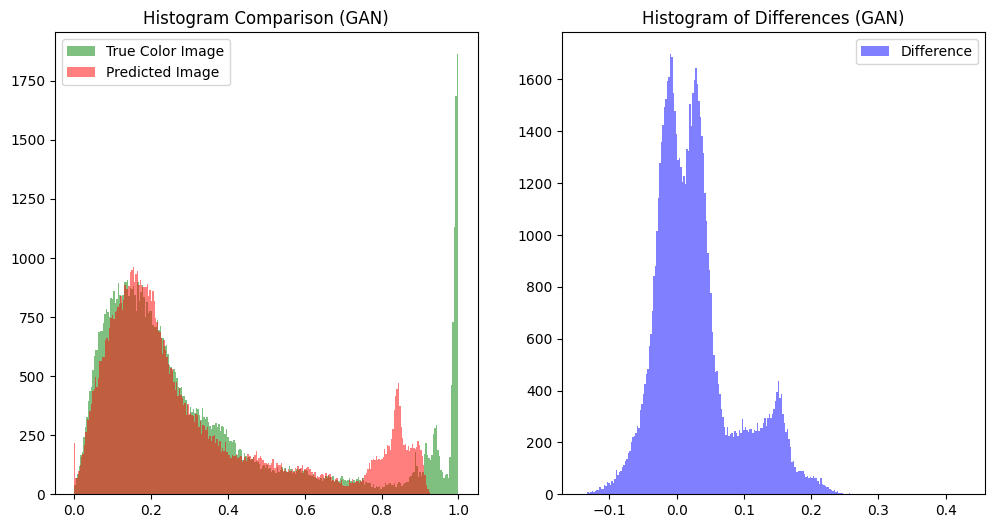

In [10]:
def plot_histogram_analysis(test_c, predicted, model_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(test_c.ravel(), bins=256, color='green', alpha=0.5, label='True Color Image')
    plt.hist(predicted.ravel(), bins=256, color='red', alpha=0.5, label='Predicted Image')
    plt.title(f'Histogram Comparison ({model_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist((test_c - predicted).ravel(), bins=256, color='blue', alpha=0.5, label='Difference')
    plt.title(f'Histogram of Differences ({model_name})')
    plt.legend()

    plt.show()

# Plot Histogram Analysis for VAE Model
for i in range(5):
    grayscale_input = test_g[i].reshape(1, img_size, img_size, 3)
    predicted_vae = np.clip(generator.predict(grayscale_input), 0.0, 1.0).reshape(img_size, img_size, 3)
    plot_histogram_analysis(test_c[i], predicted_vae, 'GAN')